In [2]:
import requests as r
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
s_price = []

stock_data = r.get("https://api.binance.com/api/v1/klines?&symbol=ETHEUR&interval=3m").json()

for i, element in enumerate(stock_data):
        #print(element[1])
        s_price.append(element[1])
#print(stock_data)
        

In [4]:
c_df = pd.DataFrame(stock_data, columns=['date', 'open', 'high', 'low', 'close', 'Volume', 'Close time','Quote asset volume', 'Trades','Tbbav', 'Tbqav', 'ig'])
c_df.set_index('date', inplace=True)
print(c_df.head())




                        open           high            low          close  \
date                                                                        
1649255040000  2980.77000000  2986.00000000  2979.77000000  2982.06000000   
1649255220000  2981.84000000  2985.14000000  2980.87000000  2983.70000000   
1649255400000  2984.26000000  2993.27000000  2981.11000000  2992.40000000   
1649255580000  2993.12000000  3001.93000000  2991.79000000  2995.55000000   
1649255760000  2995.06000000  2997.58000000  2989.37000000  2993.33000000   

                    Volume     Close time Quote asset volume  Trades  \
date                                                                   
1649255040000  92.77320000  1649255219999    276764.33074700     252   
1649255220000  26.05200000  1649255399999     77727.51390200     110   
1649255400000  36.11490000  1649255579999    107935.97201500     180   
1649255580000  80.69070000  1649255759999    241826.92510500     218   
1649255760000  22.44610000  

In [5]:
c_df.to_csv('ETHEUR.csv')

In [6]:

c_df.index = pd.to_datetime(c_df.index, unit='ms')

In [7]:
print(c_df.head())

                              open           high            low  \
date                                                               
2022-04-06 14:24:00  2980.77000000  2986.00000000  2979.77000000   
2022-04-06 14:27:00  2981.84000000  2985.14000000  2980.87000000   
2022-04-06 14:30:00  2984.26000000  2993.27000000  2981.11000000   
2022-04-06 14:33:00  2993.12000000  3001.93000000  2991.79000000   
2022-04-06 14:36:00  2995.06000000  2997.58000000  2989.37000000   

                             close       Volume     Close time  \
date                                                             
2022-04-06 14:24:00  2982.06000000  92.77320000  1649255219999   
2022-04-06 14:27:00  2983.70000000  26.05200000  1649255399999   
2022-04-06 14:30:00  2992.40000000  36.11490000  1649255579999   
2022-04-06 14:33:00  2995.55000000  80.69070000  1649255759999   
2022-04-06 14:36:00  2993.33000000  22.44610000  1649255939999   

                    Quote asset volume  Trades        Tbbav 

Text(0, 0.5, 'Open')

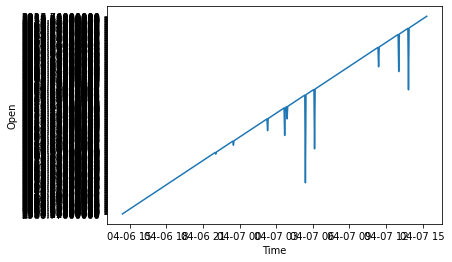

In [8]:


plt.plot(c_df.index, c_df['open'])
plt.xlabel('Time')
plt.ylabel('Open')

In [10]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=c_df.index,y=c_df['open'], mode='lines'))
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [11]:
c_df['open'].plot(label = 'ETH', figsize = (15,7))

TypeError: no numeric data to plot

In [12]:
print((c_df['open']))

date
2022-04-06 14:24:00    2980.77000000
2022-04-06 14:27:00    2981.84000000
2022-04-06 14:30:00    2984.26000000
2022-04-06 14:33:00    2993.12000000
2022-04-06 14:36:00    2995.06000000
                           ...      
2022-04-07 15:09:00    2931.25000000
2022-04-07 15:12:00    2919.45000000
2022-04-07 15:15:00    2914.41000000
2022-04-07 15:18:00    2916.74000000
2022-04-07 15:21:00    2922.50000000
Name: open, Length: 500, dtype: object


In [18]:
c_df.dtypes
print(c_df.head())

                              open           high            low  \
date                                                               
2022-04-06 14:24:00  2980.77000000  2986.00000000  2979.77000000   
2022-04-06 14:27:00  2981.84000000  2985.14000000  2980.87000000   
2022-04-06 14:30:00  2984.26000000  2993.27000000  2981.11000000   
2022-04-06 14:33:00  2993.12000000  3001.93000000  2991.79000000   
2022-04-06 14:36:00  2995.06000000  2997.58000000  2989.37000000   

                             close       Volume     Close time  \
date                                                             
2022-04-06 14:24:00  2982.06000000  92.77320000  1649255219999   
2022-04-06 14:27:00  2983.70000000  26.05200000  1649255399999   
2022-04-06 14:30:00  2992.40000000  36.11490000  1649255579999   
2022-04-06 14:33:00  2995.55000000  80.69070000  1649255759999   
2022-04-06 14:36:00  2993.33000000  22.44610000  1649255939999   

                    Quote asset volume  Trades        Tbbav 

In [19]:
c_df = c_df.apply(pd.to_numeric)

In [20]:
c_df.dtypes

open                  float64
high                  float64
low                   float64
close                 float64
Volume                float64
Close time              int64
Quote asset volume    float64
Trades                  int64
Tbbav                 float64
Tbqav                 float64
ig                      int64
dtype: object

In [21]:
c_df['Close time']= pd.to_datetime(c_df['Close time'], unit='ms')

In [23]:
print(c_df.head())

                        open     high      low    close   Volume  \
date                                                               
2022-04-06 14:24:00  2980.77  2986.00  2979.77  2982.06  92.7732   
2022-04-06 14:27:00  2981.84  2985.14  2980.87  2983.70  26.0520   
2022-04-06 14:30:00  2984.26  2993.27  2981.11  2992.40  36.1149   
2022-04-06 14:33:00  2993.12  3001.93  2991.79  2995.55  80.6907   
2022-04-06 14:36:00  2995.06  2997.58  2989.37  2993.33  22.4461   

                                 Close time  Quote asset volume  Trades  \
date                                                                      
2022-04-06 14:24:00 2022-04-06 14:26:59.999       276764.330747     252   
2022-04-06 14:27:00 2022-04-06 14:29:59.999        77727.513902     110   
2022-04-06 14:30:00 2022-04-06 14:32:59.999       107935.972015     180   
2022-04-06 14:33:00 2022-04-06 14:35:59.999       241826.925105     218   
2022-04-06 14:36:00 2022-04-06 14:38:59.999        67212.032343     125  

<AxesSubplot:xlabel='date'>

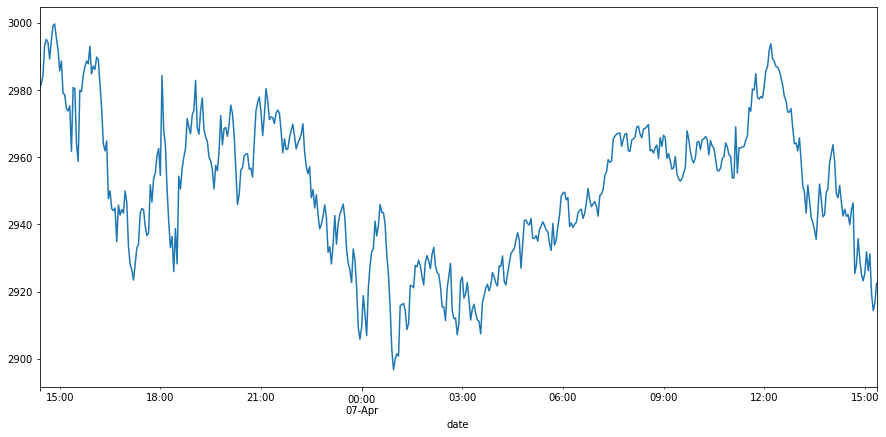

In [24]:
c_df['open'].plot(label = 'ETH', figsize = (15,7))